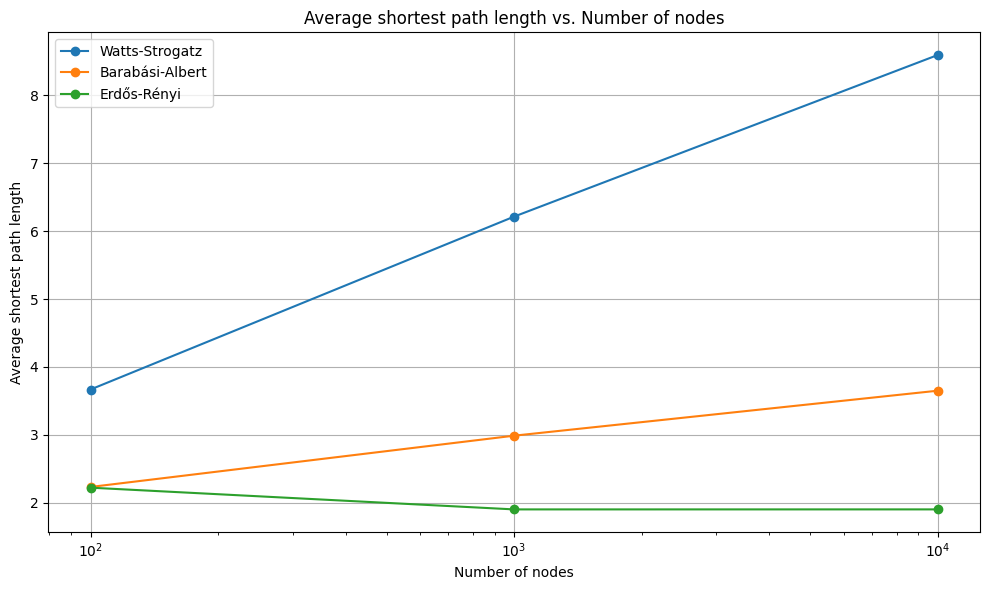

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Network parameters
k_nearest_neighbors = 6
rewiring_probability = 0.1
num_of_edges = 5
edge_creation_probability = 0.1

networks = {
    "Watts-Strogatz": lambda n: nx.watts_strogatz_graph(n, k_nearest_neighbors, rewiring_probability),
    "Barabási-Albert": lambda n: nx.barabasi_albert_graph(n, num_of_edges),
    "Erdős-Rényi": lambda n: nx.erdos_renyi_graph(n, edge_creation_probability)
}

nodes_list = [100, 1000, 10000]
results = {}

def compute_avg_shortest_path_length(networks, nodes):
    for network_name, network_func in networks.items():
        results[network_name] = []
        for num_of_nodes in nodes:
            try:
                graph = network_func(num_of_nodes)
                avg_path_length = nx.average_shortest_path_length(graph)
                results[network_name].append(avg_path_length)
            except Exception as e:
                print(f"Error with {network_name} for {num_of_nodes} nodes: {e}")
                results[network_name].append(None)

compute_avg_shortest_path_length(networks, nodes_list)

plt.figure(figsize=(10, 6))
for network_name, avg_path_lengths in results.items():
    plt.plot(nodes_list, avg_path_lengths, marker='o', label=network_name)

plt.xlabel("Number of nodes")
plt.ylabel("Average shortest path length")
plt.title("Average shortest path length vs. Number of nodes")
plt.legend()
plt.grid(True)
plt.xscale('log')  # setting x-axis to log scale for better visualization
plt.tight_layout()
plt.show()